In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load Dataset

data = pd.read_csv('/content/PRSA.csv')
data

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [6]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [7]:
data.tail()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43823,43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


In [8]:
data.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
pm2.5,2067
DEWP,0
TEMP,0
PRES,0
cbwd,0


In [9]:
data['pm2.5'].fillna(data['pm2.5'].mean(), inplace = True)

In [10]:
data['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['cbwd'] = labelencoder.fit_transform(data['cbwd'])

In [12]:
from sklearn.preprocessing import MinMaxScaler
minmaxScaler = MinMaxScaler()

data['pm2.5'] = minmaxScaler.fit_transform(data[['pm2.5']])
data['Iws'] = minmaxScaler.fit_transform(data[['Iws']])

In [13]:
data.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,0.099208,1.817246,12.448521,1016.447654,1.663267,0.040057,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,0.090396,14.433440,12.198613,10.268698,0.937981,0.085466,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.000000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,0.031187,-10.000000,2.000000,1008.000000,1.000000,0.002290,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,0.077465,2.000000,14.000000,1016.000000,2.000000,0.008408,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,0.132797,15.000000,23.000000,1025.000000,2.000000,0.036674,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,1.000000,28.000000,42.000000,1046.000000,3.000000,1.000000,27.000000,36.000000


**Visualisations**

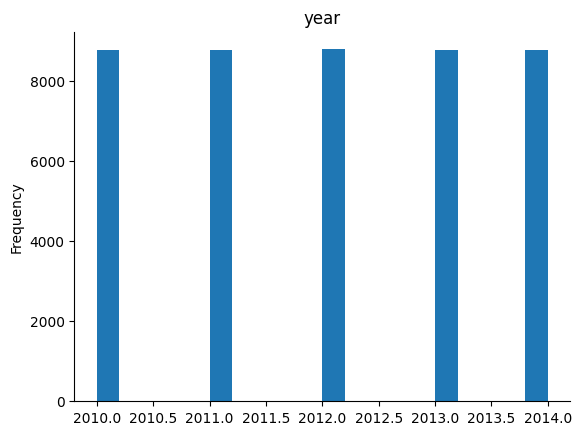

In [14]:
data['year'].plot(kind='hist', bins=20, title='year')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='year', ylabel='count'>

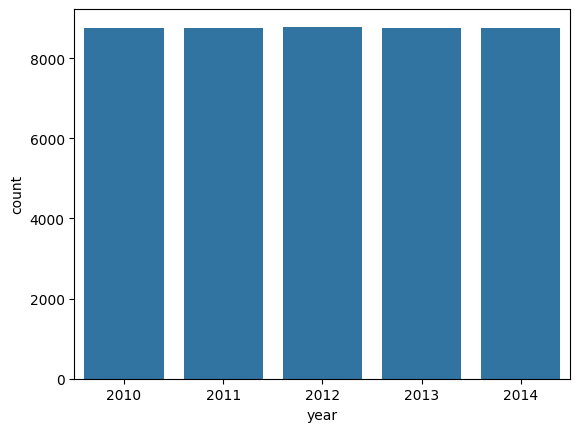

In [15]:
sns.countplot(x=data['year'],data=data)

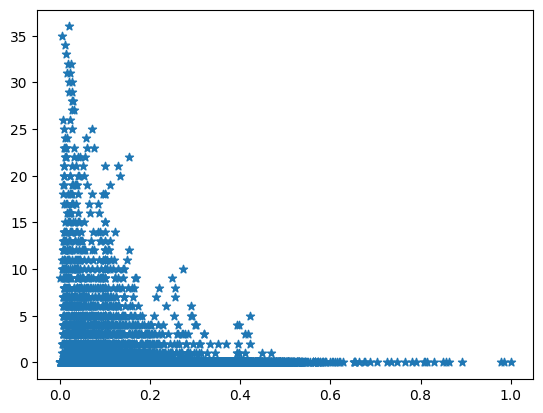

In [16]:
plt.scatter(x=data['pm2.5'],y=data['Ir'],marker='*')

<Axes: xlabel='TEMP', ylabel='DEWP'>

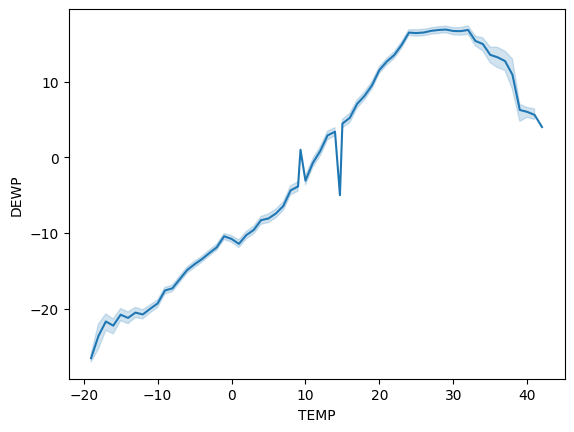

In [17]:
sns.lineplot(x=data['TEMP'],y=data['DEWP'],data=data)

<Axes: xlabel='year', ylabel='pm2.5'>

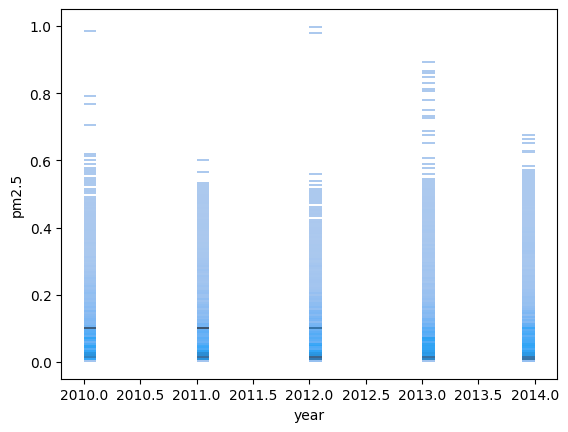

In [18]:
sns.histplot(x=data['year'],y=data['pm2.5'],data=data)


**Model Implementation**
We'll implement both Ridge Regressor and Random Forest Regressor and tune their parameters using GridSearchCV

In [19]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
data = data.iloc[:,[0,1,2,3,4,6,7,8,9,10,11,12,5]]

In [22]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [23]:
y = y.fillna(y.mean())

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 40)
print(x_train.shape)
print(x_test.shape)

(35059, 12)
(8765, 12)


In [25]:
y_train = y_train.fillna(y_train.mean())
y_test = y_test.fillna(y_test.mean())

Ridge Regressor

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [27]:
rr = Ridge(alpha=0.1)
rr.fit(x_train_scaled, y_train)

Ridge(alpha=0.1)

In [28]:
y_train_predict_rr = rr.predict(x_train_scaled)
y_test_predict_rr = rr.predict(x_test_scaled)

In [39]:
# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Train the model with the best hyperparameters
best_rr = Ridge(alpha=best_alpha)
best_rr.fit(x_train_scaled, y_train)

# Make predictions
y_train_predict_rr = best_rr.predict(x_train_scaled)
y_test_predict_rr = best_rr.predict(x_test_scaled)


Random Forest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rfr = RandomForestRegressor(n_estimators=100,
                            max_depth=7,
                            max_features='sqrt',  # Changed from 'auto' to 'sqrt'
                            min_samples_split=7,
                            min_samples_leaf=3,
                            random_state=42)

# Fit the model on the training data
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=7, random_state=42)

In [42]:
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)


In [43]:
mse = metrics.mean_squared_error(y_test,y_test_predict_rfr)
r2 = metrics.r2_score(y_test,y_test_predict_rfr)

print(np.sqrt(mse))
print(r2)

0.0674556284770384
0.43131584324448746


In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
params = {
    'max_depth': [5, 7],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'min_samples_split': [5, 7],
    'min_samples_leaf': [3, 5],
    'n_estimators': [100, 200]  # Limited the number of estimators
}

# Random Forest Regressor with a fixed random state
rfr = RandomForestRegressor(random_state=42)

In [49]:
forest = RandomizedSearchCV(rfr, params, n_iter=5, n_jobs=-1, cv=3, verbose=2, random_state=42)

# Fit the model (this should be faster)
forest.fit(x_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [5, 7],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [3, 5],
                                        'min_samples_split': [5, 7],
                                        'n_estimators': [100, 200]},
                   random_state=42, verbose=2)

In [50]:
# Output the best parameters and score
print("Best Parameters:", forest.best_params_)
print("Best Score:", forest.best_score_)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 7}
Best Score: 0.42227436128014006


**Model Evaluation**
Evaluate the models using MAE, MSE, and RMSE:

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [31]:
print("Ridge Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rr))

Ridge Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.056467502754768556
Mean Squared Error         : 0.006112593127551968
Root Mean Squared Error    : 0.07818307443143924
R2 Score                   : 0.25579640765008393


In [34]:
print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rr))


-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.05574524788438794
Mean Squared Error         : 0.005865245482563309
Root Mean Squared Error    : 0.07658489069368259
R2 Score                   : 0.2669713703690656


In [52]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.04857522095268626
Mean Squared Error         : 0.004567274949926789
Root Mean Squared Error    : 0.06758161695259139
R2 Score                   : 0.44393772756366046


In [53]:
print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr))


-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.04901734470410299
Mean Squared Error         : 0.004550261813232233
Root Mean Squared Error    : 0.0674556284770384
R2 Score                   : 0.43131584324448746


**Cross Validation and Overfitting Check**

In [64]:
# Cross-validation for Ridge Regressor
cv_scores_rr = cross_val_score(best_rr, x_train_scaled, y_train, cv=5, scoring='r2')
print("Cross-validation scores for Ridge Regressor:", cv_scores_rr)
print("Mean R2 score for Ridge Regressor:", cv_scores_rr.mean())

# Cross-validation for Random Forest Regressor
cv_scores_rfr = cross_val_score(forest.best_estimator_, x_train, y_train, cv=5, scoring='r2')
print("Cross-validation scores for Random Forest Regressor:", cv_scores_rfr)


Cross-validation scores for Ridge Regressor: [0.2491692  0.2577708  0.26280233 0.24879957 0.26059319]
Mean R2 score for Ridge Regressor: 0.2558270191418456
Cross-validation scores for Random Forest Regressor: [0.41737915 0.42727909 0.42140352 0.42754653 0.42742938]


In [69]:
# Calculate the mean R2 value
mean_cv_r2 = np.mean(cv_scores_rfr)
cv_rmse_scores = np.sqrt(cv_scores_rr)
mean_cv_rmse = cv_rmse_scores.mean()
std_cv_rmse = cv_rmse_scores.std()


print("Cross-Validation RMSE Scores:")
print(cv_rmse_scores)
print("\nMean Cross-Validation RMSE:", mean_cv_rmse)
print("Standard Deviation of Cross-Validation RMSE:", std_cv_rmse)
print("Cross-Validation R-squared (R2) Scores:")
print("\nMean Cross-Validation R-squared (R2):", mean_cv_r2)

Cross-Validation RMSE Scores:
[0.49916851 0.50771133 0.5126425  0.49879813 0.51048329]

Mean Cross-Validation RMSE: 0.5057607525875054
Standard Deviation of Cross-Validation RMSE: 0.00575154622390258
Cross-Validation R-squared (R2) Scores:

Mean Cross-Validation R-squared (R2): 0.42420753458755495


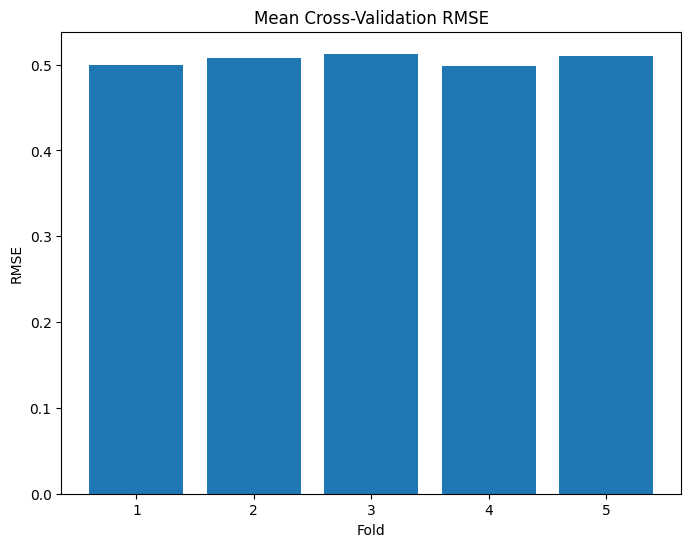

In [70]:
# Bar Plot of Mean Cross-Validation RMSE
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_rmse_scores)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('Mean Cross-Validation RMSE')
plt.show()

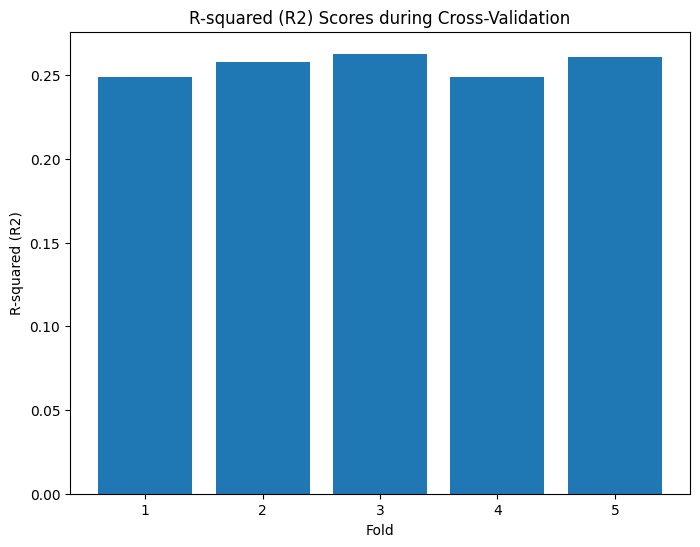

In [73]:
# Bar Plot of R-squared (R2) Scores during Cross-Validation
plt.figure(figsize=(8, 6))
plt.bar(range(1, 6), cv_scores_rr)
plt.xticks(range(1, 6))
plt.xlabel('Fold')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) Scores during Cross-Validation')
plt.show()